*Название:* **k-means**

*Принцип работы:* Находит центроиды кластера как среднее значение координат.

*Подробности:* (`init='random'`)

*Название:* **K-MEANS++**

*Принцип работы:* В классическом алгоритме k-means центроиды выбираются случайно, но это может приводить к тому, что два объекта, которые находятся близко друг к другу, будут центроидами двух разных кластеров — это будет приводить к долгой работе алгоритма.

Алгоритм k-means++ чуть «хитрее» и выбирает центроиды кластеров не совсем случайно.

*Подробности:* (`init='k-means++'`; по умолчанию в sklearn при запуске k-means используется алгоритм k-means++)

*Название:* **k-medians**

*Принцип работы:* На этапе поиска центроидов кластера находит не среднее значение координат, а медиану.


*Название:* **k-medoids**

*Принцип работы:* Работает так же, как k-medians, но медианой кластера будет не какая-то точка в кластере, а объект, который находится ближе всего к этим координатам медианы кластера.


*Название:* **fuzzy c-means**

*Принцип работы:* Данный алгоритм разрешает нечётко присваивать кластеры. Каждый объект может принадлежать к разным кластерам с разной вероятностью.

Теперь мы знаем, как работает алгоритм *k-means*, но не хотелось бы реализовывать его с нуля. Для того чтобы запустить алгоритм кластеризации *k-means*, нам нужна библиотека *sklearn* и модуль *KMeans*.

**Что необходимо для запуска?**

* Обязательно задать количество кластеров, на которые необходимо разделить данные.
* Данные, т. е. параметры объектов ($x_i$), которые мы будем передавать в виде матрицы наблюдений *X*.

После этого можно запустить алгоритм и для каждого объекта в данных получить метку, к какому кластеру этот объект относится:

In [18]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]

# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

TypeError: 'set' object is not subscriptable

Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из `df2`, то мы просто воспользуемся методом `predict`:

In [10]:
X_new = pd.df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

AttributeError: module 'pandas' has no attribute 'df2'

Чтобы запустить алгоритм, необходимо задать параметры кластеризации:

* `n_clusters` — количество кластеров. По умолчанию — 8.
* `init` — способ инициализации центроидов. Есть две опции: `random` (выбирает центроиды случайным образом) и `k-means++` (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется `k-means++`.
* `n_init` — количество случайных инициализаций алгоритма `k-means`. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия `k-means`. По умолчанию `n_init = 10`.
* `max_iter` — максимальное количество итераций алгоритма `k-means` при одном запуске. По умолчанию — 300.
* `random_state` — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

Теперь попробуем применить полученные знания на практике.

### <center>Определение оптимального k для алгоритма k-means

Рассмотрим, как побороть один из существенных недостатков алгоритма, а именно — как подобрать оптимальное количество кластеров.

    → Для этого можно использовать несколько способов: метод локтя (elbow plot), статистику разрыва (Gap Statistic Method), коэффициент силуэта (Average Silhouette Method). Мы рассмотрим метод локтя и коэффициент силуэта.

Начнём с **метода локтя**.

>Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

>Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется **недообученной (underfitting)**.

>Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется **переобученной (overfitting)**.

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси x будет отложено количество кластеров, а по оси y — инерция.

>**Инерция** *— это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.*

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_33.png)

Когда инерция быстро снижается, область считается недообученной, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается переобученной.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_19.png)

    На графике видно, что линия напоминает локоть — отсюда и название метода. Оптимальное число кластеров находится как раз на «локтевом сгибе». 

Таким образом, нам необходимо построить график и найти тот самый перегиб с оптимальным количеством кластеров. В данном случае оптимальное количество кластеров равно 4.

Как можно заметить из графика, на сгибе `k=3`. Значит, оптимальное количество кластеров, подобранное с помощью алгоритма локтя, равняется трём. Значения k от 1 до 2 — недообученная область, а после значения 3 идёт переобучение.

    → Таким образом, метод локтя — это довольно простой метод, основанный на учёте евклидова расстояния между объектами кластера и центроидами.

Однако изгиб на графике также может быть представлен нечётко:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_21.png)

Как быть в таком случае? Какое оптимальное количество кластеров выбрать?

Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**.

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

На графике ниже по оси x отложено количество кластеров, а по оси y — значение коэффициента силуэта. Можно отчётливо увидеть, что пик графика приходится на количество кластеров, равное 3:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_34.png)

>**Коэффициент силуэта** показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

    На графике для метода силуэта отчётливо виден пик с наибольшим значением коэффициента силуэта. Значит, оптимальное количество кластеров равно 3.

>Если вам нужно найти оптимальное количество кластеров для датасета, наиболее наглядным графиком будет график коэффициента силуэта, поэтому можно сразу воспользоваться им. Но стоит помнить, что для построения данного графика нужно **минимум два кластера**, так как мы сравниваем объекты одного кластера с другим, наиболее близким кластером.

#### Задание 2.7

    Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

    Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

    Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

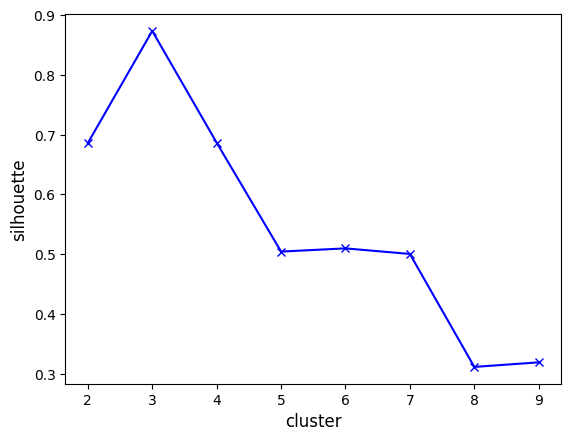

In [20]:
from sklearn.metrics import silhouette_score
import pandas as pd

instr_df = pd.read_csv("./data/values_from_the_instrument.csv")

def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,instr_df))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

    ✍Итак, подбирать оптимальное количество кластеров мы научились. Но как оценить, насколько хорошие кластеры у нас получились?

Допустим, мы разделили кошек и собак на два кластера: в каждом из кластеров находятся либо только кошки, либо только собаки. Но может получиться так, что в ходе кластеризации мы разделим одинаковых собак по разным кластерам или кошки с собаками перемешаются, как на рисунке ниже:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_25.png)

Поэтому было бы хорошо как-то оценивать, не создали ли мы лишние кластеры или одинаковые ли объекты в нашем кластере. В этом нам помогут метрики, которые мы рассмотрим далее.

Чтобы понять, правильно ли объекты распределились по кластерам, необходимо знать, в каких кластерах должны быть объекты.

    → Ранее мы говорили, что кластеризация относится к методу машинного обучения без учителя и применяется, когда нет размеченных данных, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. В таком случае мы можем провести дополнительный анализ получившихся кластеров.

Существует ряд метрик, которые можно подсчитать, **если данные размечены**. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:


1. **Однородность кластеров (homogeneity score)**

>Данная метрика, как и три последующих, может применяться, **только** когда есть размеченные данные.

>Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.

Например, нам нужно распределить кошек и собак по разным кластерам. В первом случае нам это удалось, а во втором одна собака «убежала» к кошкам, одна кошка — к собакам, и животные перемешались:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_26.png)

Таким образом, во втором случае в кластере оказались разные животные, поэтому однородность снизилась.

    → В первом кластере метрика однородности будет максимальной и равна 1, во втором значение однородности будет меньше, так как животные немного перемешались. Если бы кластер был максимально неоднородный, значение метрики было бы равно 0.

Теперь посмотрим, как рассчитать метрику однородности в *sklearn*. Рассмотрим два случая комбинаций ответов модели и истинных кластеров объектов. В первом случае ответы модели будут полностью совпадать с истинными ответами, а во втором будут полностью противоположны им:

`# импортируем подсчёт метрики однородности кластеров`
`from sklearn.metrics.cluster import homogeneity_score`

`# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы`
`print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))`
`> 1.0`
`print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))`
`> 1.0`

Во втором случае мы получаем метрику, равную 1, хотя предсказывали совершенно противоположный результат. Почему так получилось?

Допустим, наши 0 и 1 — это номера кластеров, в которых находятся кошки и собаки:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_27.png)

`labels_true` — это реальные значения: в кластере 0 — собаки, в кластере 1 — кошки. В первый раз мы предсказали, что в кластере 0 находятся две собаки, а в кластере 1 — две кошки. Метрика однородности равна 1, так как внутри кластеров разные объекты и наши ответы полностью совпали с `labels_true`.

Во втором случае, казалось бы, будет неверно, если в кластере 0 будут кошки, а в кластере 1 — собаки. Но, судя по составу кластеров, кошки и собаки не перемешались, поэтому однородность кластеров будет равна 1.

Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_47.png)

`# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания`
`print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))`
`>1.0`
`print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))`
`>1.0`

Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными.

2. **Полнота кластера (completeness score)**

    Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_28.png)

На рисунке выше c — это completeness, или полнота.

При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.

`# импортируем метрику полноты`
`from sklearn.metrics.cluster import completeness_score`

`# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику`
`completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])`
`1.0`

Рассмотрим метрику полноты на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_35.png)

`# посчитаем, насколько полными получились кластеры с покемонами`
`print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))`
`> 1.0`
`# посчитаем, насколько полными получились кластеры с покемонами`
`print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))`
`> 0.829867483307009`

Во втором случае третий кластер оказался неполным, так как предсказано, что половина объектов принадлежит к третьему кластеру, а другая половина — к четвёртому. Однако два других кластера предсказаны правильно, поэтому метрика полноты меньше 1, но всё же её значение не такое низкое.

3. **V-мера (V-Measure)**

Эта метрика — комбинация метрик полноты и однородности.

    Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

V-мера рассчитывается по формуле:

![](./image/ML_4_1.png)

По умолчанию ${betta}=1$, но это значение можно варьировать, если хочется дать разный вес разным свойствам.

* Если однородность кластеров важнее, чем их полнота, следует указать значение ${betta}<1$. Тогда значение ${betta} x homogeneity$ в знаменателе получится небольшим и тем самым будет сильнее влиять на значение $v$. Чем меньше ${betta} x homogeneity$, тем выше $v$.
* Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов, тогда мы регулируем значение ${betta}$ так, чтобы ${betta}>1$.

Данную метрику можно сравнить с метрикой F-меры, которую вы изучили, когда проходили метрики для оценки моделей классификации. F-мера рассчитывается следующим образом:

![](./image/ML_4_2.png)

где $precision$ показывает точность, а $recall$ — полноту.

При стандартном расчёте V-меры ${betta}$ равна 1:

![](./image/ML_4_3.png)

Получается такая же формула, как и при расчёте F-меры.

    → Метрику однородности кластера при кластеризации можно сравнить с метрикой precision из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика recall из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

>Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

Допустим, мы разделили данные следующим образом:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_29.png)

Если бы мы считали метрику однородности кластеров, то она была бы равна 1, так как кластеры однородны и собаки и кошки внутри них не перемешаны. Но очевидно, что кластеризация неидеальна: вместо одного кластера с собаками у нас целых два. Поэтому если бы мы неправильно выбрали метрику (считали бы однородность) для определения качества кластеризации, то сделали бы неверные выводы. Но если мы будем считать V-меру, то будем одновременно учитывать оба фактора (полноту и однородность кластеров). Если же какой-то из факторов для нас важнее, мы можем изменять значение ${betta}$, придавая больший вес однородности кластера или полноте.

Посчитаем V-меру для двух случаев кластеризации датасета с покемонами:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_36.png)

`# импортируем из библиотеки sklearn подсчёт V-меры`
`from sklearn.metrics import v_measure_score`

`# посчитаем V-меру для кластеров с покемонами`
`print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))`
`>1.0`

`print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))`
`>0.9070246789753754`

В первом случае и полнота, и однородность кластеров были равны 1, поэтому V-мера, основанная на этих двух метриках, получила максимальное значение (1). Во втором случае полнота кластеризации была равна 0.83, так как один из кластеров был наполнен наполовину. Этот факт отразился и на значении V-меры, но, так как однородность кластеров имела максимальное значение,V-мера приняла значение 0.9.

4. **Индекс Рэнда**

    Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

![](./image/ML_4_4.png)

где $number of pairs$ — общее количество пар, $number of agreeing pairs$ — количество пар, для которых предсказание и истинные значения совпали.

По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_30.png)

Запустим подсчёт индекса Рэнда в sklearn:

`# импортируем из библиотеки sklearn подсчёт индекса Рэнда`
`from sklearn.metrics.cluster import rand_score`
`# передаём в rand_score размеченные и предсказанные данные`
`rand_score([0, 0, 1, 1], [0, 0, 1, 1])`
`1.0`

В данном случае мы получили индекс Рэнда, равный 1. Это означает, что все объекты в предсказанном кластере попали в те кластеры, в которые должны были попасть.

![](./image/ML_4_5.png)

### <center>Иерархическая кластеризация

>Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.

При иерархической кластеризации строится **дендрограмма**. Её можно сравнить с древом языков мира, на котором языки объединяются в различные семьи, укрупняясь и образуя всё более обширные языковые ветви:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_1.png)

>**Дендрограмма** — это древовидная диаграмма, которая содержит $n$ уровней. Каждый уровень — это шаг укрупнения кластеров.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_2.png)

Чем больше схожесть между двумя объектами на дендрограмме, тем ниже высота внутренней ветки, которая идёт из объекта или кластера:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_3.png)

На дендрограмме выше Сельма и Пэтти Бувье, сёстры Мардж Симпсон, похожи друг на друга, поэтому высота соединяющей их внутренней ветки маленькая, а сама Мардж не похожа на своих сестёр, поэтому высота внутренней ветки гораздо больше.

______

Перейдём к более реальным примерам.

Например, дендрограмма для кластеризации трёх видов ирисов будет выглядеть следующим образом:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_4.png)

Справа расположены **листья** дендрограммы. Внизу дендрограммы отложена схожесть объектов. Количество уровней дендрограммы соответствует числу шагов слияния или разделения кластеров. На листьях находятся исходные объекты. Далее мы объединяем эти объекты в маленькие группы — это первый шаг кластеризации. После этого с каждым шагом объекты образуют всё большие и большие кластеры, пока на последнем шаге не образуется один большой кластер (**корень** дендрограммы), содержащий все три вида ирисов. Для определения количества кластеров на каждом шаге мы можем мысленно проводить вертикальную линию и смотреть, сколько внутренних веток пересекла эта линия. 

Наши линии на картинке пересекают две и четыре линии. Это означает, что на этих шагах данные делятся на два или четыре кластера.

Если ещё раз посмотреть на график с дендрограммой ирисов, можно сказать, что при кластеризации мы можем пойти снизу вверх (от листьев к корню) или сверху вниз (от корня к листьям). И действительно — при иерархической кластеризации выделяют два подхода: **агломеративный** и **дивизионный**. В первом случае кластеры образуются снизу вверх, т. е. при объединении кластеров, а во втором — сверху вниз, в ходе деления крупных кластеров:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_5.png)

**Дивизионный (дивизивный) метод (divisive)**

Кластеры создаются при делении крупных кластеров:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_7.png)

**Агломеративный метод (agglomerative)**

Новые кластеры создаются в ходе объединения более мелких кластеров:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_6.png)

Для того чтобы построить дендрограмму, нужна **матрица сходства**, построенная на основе расстояний между кластерами.

В общем виде матрица сходства выглядит следующим образом:

![](./image/ML_4_6.png)

$K$ — это мера сходства между двумя кластерами. По диагонали в матрице записаны единицы, так как объекты максимально похожи на самих себя.

Чтобы рассчитать данную матрицу, нужно знать расстояния между двумя кластерами. Существуют разные подходы его вычисления, и выбранный подход влияет на результат кластеризации.

**Методы определения расстояния между кластерами:**

![](./image/ML_4_7.png)

В зависимости от того, каким способом рассчитывается расстояние, можно получить разные результаты кластеризации.

На картинке ниже рассматривается иерархическая кластеризация при использовании разных подходов для подсчёта расстояния ↓

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_13.png)

В **первом** столбце представлено использование метода одиночной связи, во **втором** — метода средней связи, в **третьем** — метода полной связи.

Различные кластеры обозначены разными цветами: оранжевым, зелёным и синим. 

    Как видим, иерархическая кластеризация с использованием метода одиночной связи хорошо отрабатывает на первых двух распределениях датасетов, но очень плохо справляется с вытянутыми и перекрывающимися данными. Алгоритм иерархической кластеризации работает по принципу «богатый становится богаче». Это может приводить к неравномерному распределению кластеров. Данный способ больше других страдает от неравномерного распределения кластеров: это можно наблюдать в третьей, четвёртой и шестой строках части Single Linkage на картинке — мы видим очень редкие вкрапления зелёного кластера, а всё остальное пространство принадлежит синему кластеру.

`Использование методов средней связи и полной связи приносит хорошие результаты только при условии, что данные имеют высокую плотность и не пересекаются, или же для однородно распределённых данных. В остальных случаях они отрабатывают плохо.`

**Для каких задач используется иерархическая кластеризация?**

* Для построения филогенетического дерева.

Например, если известна ДНК-последовательность, можно построить филогенетическое дерево.

На рисунке ниже иерархическая кластеризация была проведена на основе ДНК животных:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_14.png)

* Для анализа текстов.

Например, с помощью кластеризации Брауна (частный случай иерархической кластеризации) можно сгруппировать слова и найти синонимы. Слова, которые были встроены в похожие контексты и считаются семантически связанными, оказываются в одном кластере:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_15.png)

**Как запустить иерархическую кластеризацию?**

Давайте попробуем кластеризовать датасет с покемонами с помощью иерархической кластеризации.

Запустим алгоритм (такой же, как k-means). Из библиотеки sklearn импортируем алгомеративную кластеризацию, далее запустим метод `fit()`, передав вектор X из признаков объектов, и обучим модель кластеризации.

Базовые параметры, которые необходимо передать в **AgglomerativeClustering**:

* `n_clusters` — количество кластеров; по умолчанию — 2.
* `linkage` — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать `single`, `ward`, `average`, `complete`; по умолчанию используется `ward`.

**Какое количество кластеров задать в начале?**

* Иногда при постановке задачи может быть чётко указано, что необходимо разделить данные на N кластеров. В таком случае проблем не возникнет.
* Если кластеризацию требуется провести по двум-трём признакам, можно визуализировать данные и прикинуть, на сколько кластеров их можно разделить.
* Выбрать какое-нибудь количество кластеров, например три-четыре, провести кластеризацию и визуализировать дендрограмму. Далее, основываясь на дендрограмме, можно примерно определить оптимальное количество кластеров.

Чуть позже мы научимся визуализировать дендрограмму, а сейчас давайте посмотрим на дендрограмму проведённой кластеризации. Попытаемся понять, какое оптимальное количество кластеров для кластеризации нужно выбрать. Дендрограмма получилась большой и сложной для восприятия и понимания. Можно увидеть, что, если мы проведём горизонтальную линию на расстоянии между кластерами, равном 6, данные отлично разделятся на три кластера:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_16.png)

**Преимущества и недостатки иерархической кластеризации**

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@happy-icon.png)

* Можно построить дендрограмму и понять, как устроены данные.
* Работает на небольшом датасете.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@sad-icon.png)

* Необходимость выбора оптимального количества кластеров.
* Если данных много, дендрограмма становится большой и сложной для понимания.
* Может неравномерно разделять данные на кластеры.

>В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.

Один из примеров *EM (Expectation-maximization)*-алгоритма — это *k-means*-кластеризация, рассмотренная нами ранее.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере *k-means*, то:

* на шаге **E** мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
* на шаге **M** мы пересчитываем центроиды кластеров.

Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм *k-means* не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — **модель гауссовой смеси (Gaussian Mixture Model, GMM)**, в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_17.png)

На шаге E данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру, а на шаге M будем пересчитывать параметры функции Гаусса, чтобы подобрать наиболее подходящие кластеры для наших данных.

На анимации ниже гауссовы функции подгоняются под размеры кластеров:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_18.gif)

**Для каких задач используется EM-кластеризация?**

* *GMM*-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_19.png)

* *GMM* можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_20.png)

* Используя *GMM*, можно анализировать временные ряды цен в периоды действия акций.

**Как запустить EM-кластеризацию?**

Запустим алгоритм на датасете покемонов и попробуем кластеризовать их по силе атаки и уровню защиты:

In [21]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

NameError: name 'X' is not defined

Основные параметры, которые необходимо задать для запуска алгоритма **GaussianMixture**:

* `n_components` — количество кластеров.
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

Параметров при запуске может быть больше, при желании можно почитать о них в документации *sklearn*:

In [22]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)
>>> Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)

SyntaxError: invalid syntax (1067971466.py, line 3)

Визуализируем результаты:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_21.png)

Алгоритм отлично справился со своей задачей и разделил данные на три кластера, которые получились однородными. Как видим, есть также одна точка-выброс, которую алгоритм не выделил в отдельный кластер.

Если выбрать количество кластеров, равное 4, получим следующий результат:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_22.png)

Как мы видим, в данном случае алгоритм тоже не выделил выброс в отдельный класс, но с кластеризацией также справился отлично.

**Преимущества и недостатки EM-кластеризации**

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@happy-icon.png)

* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_23.png)

* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_24.png)

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@sad-icon.png)

* Нужно задавать количество кластеров.
* Чувствителен к тому, с какой точки начинается алгоритм.
* Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

>Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

Более подробно со спектром вы познакомитесь, когда будете изучать линейную алгебру.

Алгоритм спектральной кластеризации состоит из **четырёх шагов**:

1. На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете.

Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине.

Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_25.png)

2. После этого проводим некоторые математические преобразования этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_26.png)

3. Далее уменьшаем размерность данных.

Сейчас одна вершина описывается шестью признаками, а значит, если проводить кластеризацию этих данных, кластеризация будет в шестимерном пространстве. С помощью подходов понижения размерности мы можем уменьшить количество признаков, описывающих вершину. На данный момент вникать в суть преобразований нам не нужно (в одном из следующих юнитов этого модуля мы разберём эту задачу более подробно) — сейчас важно понять саму идею преобразования, а также то, что до понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_27.png)

Теперь одна вершина описывается одним признаком.

4. Далее проводим кластеризацию матрицы с уменьшенной размерностью.

Основываясь на значениях признаков v2, мы можем определить вершины 1, 2 и 3 в один кластер, а вершины 4, 5, 6 — в другой. То, что разные вершины стали принадлежать к разным кластерам, можно визуализировать следующим образом:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_28.png)

Таким образом, мы «разрезаем» исходный граф на два более маленьких графа. Каждый подграф — это отдельный кластер. Мы разрезаем граф так, чтобы похожие вершины оказываются в одном подграфе, а непохожие — в другом.

В самом начале мы не могли так разрезать граф, так как было непонятно, как разделить его так, чтобы похожие вершины оказались в одном кластере. Применив математические преобразования, мы смогли это сделать и таким образом кластеризовали наши данные.

**Для каких задач используется спектральная кластеризация?**

Данный метод широко используется для сегментации изображений. В данном случае вершины графа — это пиксели изображения.

Например, если у нас есть зашумлённая картинка (ниже слева), на которой нужно сегментировать изображение и выделить разные кластеры, то спектральная кластеризация отлично подойдёт для такой задачи. Результаты сегментации можно наблюдать на картинке справа:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_29.png)

>При желании вы можете повторить этот эксперимент самостоятельно.

**Как запустить спектральную кластеризацию?**

Рассмотрим это на нашем примере датасета с покемонами:

`# вызываем из sklearn SpectralClustering`
`from sklearn.cluster import SpectralClustering`

`# запускаем кластеризацию, задав количество кластеров, равное 3`
`spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)`

`spectral_clustering.fit(df[['Attack', 'Defense']])`
`# получаем результаты кластеризации`
`spectral_predictions = spectral_clustering.labels_`

Основные параметры **SpectralClustering**:

* `n_clusters` — количество кластеров; по умолчанию — 8.
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.
Визуализируем результаты:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_30.png)

Для четырёх кластеров:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_31.png)

Как мы можем заметить, спектральная кластеризация так же, как и другие типы кластеризации, не справляется с выбросами и не выделяет их в отдельный кластер. К сожалению, этот недостаток алгоритма нельзя исправить.

**Преимущества и недостатки спектральной кластеризации**

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@happy-icon.png)

* Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.
* Эффективна для кластеризации разрежённых данных.
* Хорошо работает на практически любых распределениях данных. На рисунке ниже представлены результаты кластеризации данных с разным распределением признаков:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_32.png)

Алгоритм показал хорошие результаты во всех случаях, за исключением данных в форме вытянутого эллипса (столбец 3).

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@sad-icon.png)

* Нужно заранее задавать количество кластеров.
* Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.

>Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются **шумом**.

    При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

Наиболее популярный алгоритм кластеризации на основе плотности — **DBSCAN**. Далее мы рассмотрим его подробнее.

### DBSCAN (Density-based spatial clustering of applications with noise)

Данный алгоритм применим, если:

* перед вами стоит задача с данными сложной формы, например выделение районов на карте:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_33.png)

* в данных большое количество выбросов, например данные медицинских анализов пациентов.

В таких случаях ранее изученный алгоритм k-means не поможет. Зато на помощь придёт DBSCAN.

>**Преимущества алгоритма DBSCAN:**

>* В отличие от k-means, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.
>* Алгоритм хорошо работает с данными произвольной формы.
>* DBSCAN отлично справляется с выбросами в датасетах.

Посмотрим на рисунок, где показано, как два разных алгоритма отрабатывают на разных данных. Первая строчка — это алгоритм DBSCAN, вторая — k-means. Данные имеют разное распределение: например, данные в первом столбце распределены в виде двух окружностей (синей и оранжевой), данные в четвёртом столбце — в виде трёх отдельных кластеров.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_34.png)

Как видим, если датасеты хорошо разделены, как в четвёртом случае, то оба алгоритма (k-means и DBSCAN) справляются хорошо.

В отличие от k-means, алгоритм DBSCAN отлично справился с кластеризацией данных под номерами 1 и 2.

Для случая под номером 3 результаты обоих алгоритмов кластеризации являются спорными. Более интуитивной кажется следующая интерпретация данных: нижнее скопление — первый кластер, среднее — второй, правое верхнее — третий. Наиболее разреженные и отдаленные точки, не попадающие ни в один кластер, можно отнести либо к ближайшему кластеру, либо к выбросам.

Особое внимание стоит обратить на решение задачи кластеризации в последнем, пятом случае:

* DBSCAN определил, что плотность точек примерно равномерна на всей площади распределения и отнес все точки к единому кластеру. Это связано с тем, что приведённые данные образуют один участок с одинаковой плотностью, из-за чего DBSCAN не может разделить такие данные на кластеры;
* Алгоритм k-means разделил данные на заранее заданные три кластера, что является иллюстрацией недостатка методов, где пользователь самостоятельно задаёт количество кластеров.

_______

Давайте подробнее посмотрим, как работает DBSCAN. Допустим, у нас есть признаки $X={x_1,x_2}$ (значения роста и веса людей). Если визуализировать эти данные, становится понятно, что их можно разделить на два кластера, а также наблюдаются выбросы (серые точки):

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_35.png)

Так как розовый кластер огибает синий, у стандартных методов вроде k-means могут быть трудности при кластеризации. При использовании k-means мы можем получить следующие результаты:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_36.png)

Алгоритм DBSCAN поможет не допустить такого.

    → Чтобы понять, как он работает, вспомните, на какую информацию вы обращаете внимание, когда смотрите на данные и пытаетесь их кластеризовать. Обычно мы смотрим на плотность распределения данных: там, где большая плотность, и будет кластер, а точки, находящиеся в области низкой плотности, обычно считаются выбросами. Чтобы алгоритм кластеризовал данные, как человек, ему нужно кластеризовать, основываясь на плотности данных.

**Рассмотрим работу алгоритма кластеризации DBSCAN ↓**

1. Сначала необходимо выбрать случайный объект в данных (на рисунке выбранная точка выделена красным) и в некотором радиусе  от этой точки найти всех соседей. На рисунке окружность выделена оранжевым цветом, а соседи — это все те точки, что попадают в оранжевую окружность. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. В данном случае точек пять:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_37.png)

Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.

Посмотрим на одну из точек, которая находится в отдалении от всех других. Можно заметить, что в заданном радиусе у неё нет никаких соседей:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_38.png)

2. Выделим центральные точки (core points).

>**Центральными** будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.

В наших данных четыре выделенные точки (красные точки на картинке выше) будут считаться центральными, так как вокруг них расположено три и более точек. Пятая красная точка не будет считаться центральной, так как вокруг неё нет соседей.

Находим центральные точки во всём датасете. Это будет выглядеть так:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_39.png)

3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_40.png)

Они также будут отнесены к первому кластеру. На рисунке выше эти точки выделены розовым.

Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер. Таким образом, мы получили первый, розовый, кластер:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_41.png)

4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе  от объектов, принадлежащих первому кластеру. На рисунке ниже эти точки указаны стрелкой и теперь тоже принадлежат к кластеру 1:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_42.png)

5. Далее переходим к неразмеченной области в данных (второй кластер с красными точками). Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй, синий, кластер:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_43.png)

Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру. На рисунке выше они обозначены серым.

### Для каких задач используется DBSCAN?

Данный алгоритм довольно популярный — областей его применения много.

* Можно использовать DBSCAN для разработки системы рекомендаций в магазине. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести DBSCAN-кластеризацию.

    Например, два покупателя оказались в одном кластере: один купил печенье, книгу и плед, а второй — только книгу и плед. На основе этой информации мы можем порекомендовать второму покупателю купить ещё и печенье.

* Данный алгоритм успешно справляется с поиском выбросов в данных. Рассмотренные ранее алгоритмы кластеризации, в отличие от DBSCAN, не выделяют выбросы в отдельные объекты.

    Это свойство алгоритма можно использовать для поиска отклонений медицинских показателей пациентов или для анализа финансового мошенничества.

* Часто DBSCAN применяют для кластеризации геоданных, так как он может выделять данные сложной формы.

Например, на основе статистики заказов такси в пятничный вечер с помощью кластеризации можно выделить районы города, куда можно поехать отдыхать в преддверии выходных. Ваши коллеги из отдела Data Science в компании «Ситимобил» провели такой анализ для Петербурга и получили следующие результаты:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_44.png)

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_45.png)

Как мы можем заметить, алгоритм DBSCAN лучше всего справляется с задачей, выделяя сложные участки на карте.

`#### Как запустить DBSCAN в sklearn?`

`Запуск алгоритма довольно простой и похож на запуск k-means. Вновь обратимся к нашему датасету с покемонами.`

`# Импортируем DBSCAN-кластеризацию`
`from sklearn.cluster import DBSCAN`

`# Запускаем кластеризацию на наших данных`
`clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])`

`# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means`
`sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)`

Основные параметры для запуска **DBSCAN**:

* `eps` — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
* `min_samples` — задаёт минимальное количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_46.png)

В данном случае мы не задавали количество кластеров, алгоритм смог сам разделить данные. Также DBSCAN смог выделить выброс в данных.

### Преимущества и недостатки DBSCAN

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@happy-icon.png)

* Не нужно задавать количество кластеров.
* Устойчив к шуму и выбросам, может находить выбросы в данных.
* Способен найти кластеры любой геометрической формы.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@sad-icon.png)

* Не может качественно кластеризовать наборы данных с большой разницей в плотности.
* Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.
* Бывает сложно подобрать `eps`.

______

Итак, мы рассмотрели наиболее популярные алгоритмы кластеризации. Давайте подведём итог и соберём основную информацию по разным видам кластеризации в таблицу:

![](./image/ML_4_8.png)

В зависимости от количества признаков, описывающих объект, можно выделить две разновидности визуализации: 2D и 3D.

Если объект описывается двумя признаками, например рост и вес, эти значения легко распределить по осям X и Y. Если прибавляется ещё один признак, понадобится дополнительная ось Z, и график будет трёхмерным. В зависимости от алгоритма кластеризации мы можем просто визуализировать кластеры или же нарисовать дендрограмму.

**рассмотрим следующие способы визуализации:**

* **диаграмма рассеяния** для двухмерного и трёхмерного случаев;
* **Convex Hull**, или выпуклая оболочка;
* **дендрограмма**;
* **Clustergram**.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-4_1.png)

Рассмотрим кластеризацию по двум признакам, а именно — выделим группы жилья по локации. К текущим признакам добавим цену и рассмотрим, как локация влияет на цену.

Загрузим данные:

In [4]:
# импортируем библиотеки, которые нам понадобятся для работы с датафреймом, кластеризацией и визуализацией
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("./data/airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


В данном датасете довольно много данных, например имя арендодателя, минимальное время аренды. Нас интересуют только широта (столбец latitude) и долгота (столбец longitude), а также цена (столбец price) аренды квартиры. Визуализируем данные, основываясь на широте и долготе:

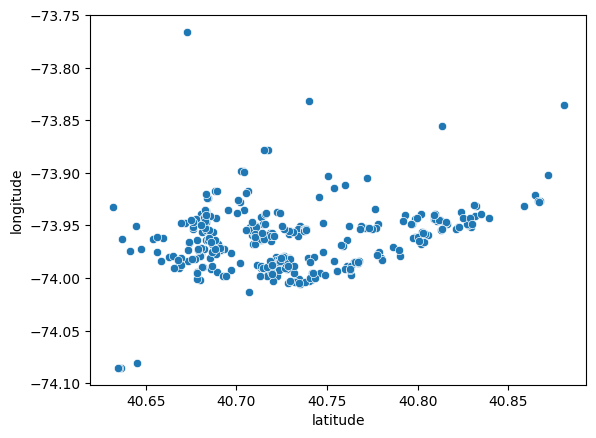

In [6]:
sns.scatterplot(x=df.latitude, y=df.longitude);

### <center>2D-визуализация кластеров и центроидов

**Диаграмма рассеяния**

Самый простой способ визуализировать получившиеся кластеры — выделить разными цветами данные, принадлежащие к разным кластерам. В этом поможет **диаграмма рассеяния**, на которой по двум осям откладываются значения признаков объекта. С помощью такой простой визуализации легко понять, правильно ли прошла кластеризация, действительно ли разные объекты оказались в разных классах, а похожие — в одном.

Мы с вами уже умеем визуализировать диаграммы рассеяния и выделять разными цветами данные, принадлежащие к разным кластерам. Сейчас мы повторим пройденное, а также дополнительно выделим на графике центроиды кластеров. Для этого построим модель k-means-кластеризации, выделив в данных шесть кластеров, а далее найдём центроиды и визуализируем результаты.

In [7]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions


# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

Создадим новые столбцы (cen_x, cen_y, color) в датафрейме. В зависимости от значения в ячейке clusters в ячейках cen_x, cen_y и color будут разные значения: если значение в clusters — 0, в cen_x и cen_y будут указаны координаты центроида нулевого кластера и цвет нулевого кластера.

In [8]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5,40.668642,-73.996422,#DF8520
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,4,40.771815,-73.972800,#20DFC5
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,40.821324,-73.940368,#81DF20
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2,40.692136,-73.955451,#2095DF
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,40.821324,-73.940368,#81DF20


Мы можем просто визуализировать полученные кластеры, передав в переменную информацию о том, какой элемент к какому кластеру принадлежит. В таком случае Seaborn будет автоматически подбирать цвета для кластеров:

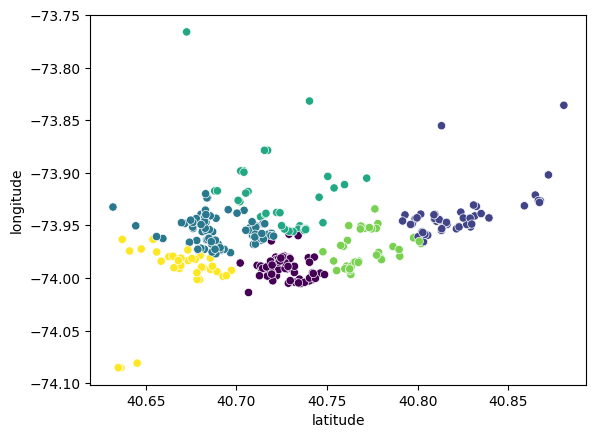

In [10]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.clusters);

Если мы хотим задать определённые цвета для кластеров, в переменную c передадим столбец с заданными цветами:

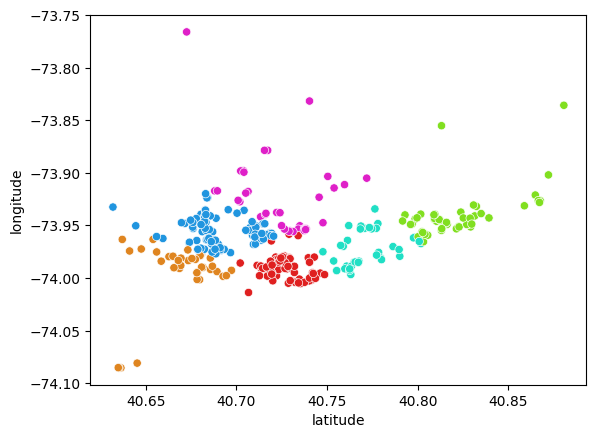

In [12]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color);

Если точек слишком много или мало, может понадобиться уменьшить или увеличить их размер. В этом поможет переменная s.

Также могут встретиться перекрывающиеся кластеры — а таком случае нужно, чтобы цвета объектов в кластере были полупрозрачными. В этом поможет переменная alpha: чем ближе её значение к 1, тем менее прозрачны объекты на графике.

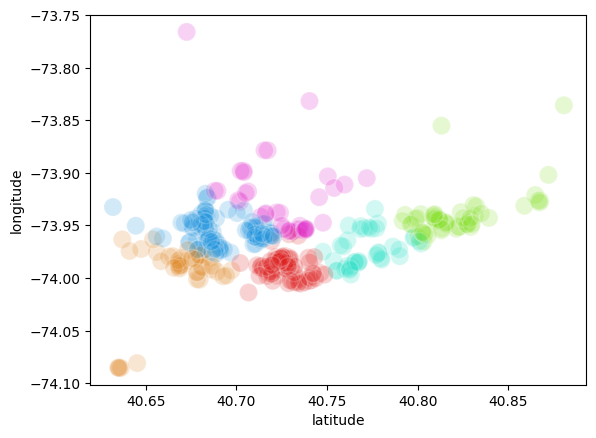

In [13]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.2, s=170);

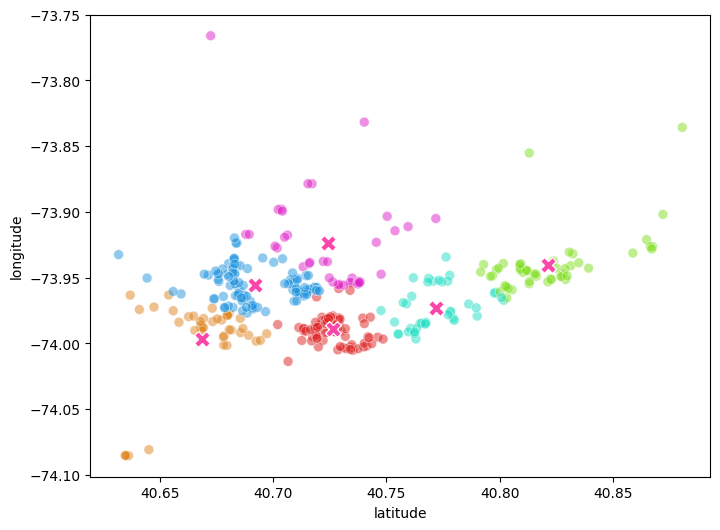

In [15]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130);

>Итак, мы визуализировали кластеры, а также отметили центроиды этих кластеров. Визуализация центроидов кластеров помогает понять, насколько элементы кластера находятся далеко или близко к центроиду. Если элемент находится далеко от центроида и от других элементов, то он сильно непохож на элементы своего кластера.

>Если в одном пространстве много скоплений точек, при визуализации мы можем увеличить прозрачность точек с помощью параметра alpha. Таким образом, тот участок, который будет насыщеннее по цвету, будет содержать больше скоплений точек.

>В данном случае мы визуализировали результаты кластеризации и можем заметить, что в целом кластеризация выглядит логичной. Также можно отметить, что в данных есть выбросы, так как есть точки, которые расположены очень далеко от центроидов кластеров.

**Convex Hull**

В предыдущем примере оценивать размеры кластеров мы могли лишь на глаз. При рассмотрении диаграммы рассеяния вам, возможно, хотелось провести «границы» кластеров, чтобы оценить их размеры. Провести границы кластеров мы можем с помощью визуализации **выпуклых оболочек** кластеров.

>**Выпуклая оболочка (Convex Hull) множества точек** — это такое выпуклое множество точек, в котором лежат все точки фигуры.

Представьте, что по стене развешены крючки. Чтобы найти выпуклую оболочку этих крючков, необходимо взять лассо, набросить его на крючки и затянуть. Верёвка будет окружать все крючки, а касаться будет только тех, что снаружи. Петля, которая будет окружать крючки, и будет считаться выпуклой оболочкой:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-4_9.png)

>Визуализация *Convex Hull* помогает понять, насколько получившиеся кластеры крупные и разнообразные. Если все элементы кластера похожи друг на друга, площадь выпуклой оболочки будет маленькой, в противном случае — наоборот. Также на данной диаграмме хорошо заметны выбросы в данных. Выбросы находятся далеко от основных элементов кластера, а значит площадь выпуклой оболочки получается большой.

Для построения выпуклой оболочки каждого кластера воспользуемся библиотекой **Scipy** и классом **ConvexHull**.

Scipy можно установить следующим образом:

`pip install scipy`

`ConvexHull` принимает на вход значения признаков объектов, для которых нужно построить выпуклую оболочку. Индексы точек из `points`, которые образуют вершины выпуклой оболочки, можно получить с помощью метода `vertices`:

In [18]:
from scipy.spatial import ConvexHull
import numpy as np

points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

array([0, 4, 3, 2], dtype=int32)

Мы получим список из значений координат [0, 4, 3, 2].

После этого мы можем найти координаты этих точек из списка points. Получим выпуклую оболочку наших кластеров:

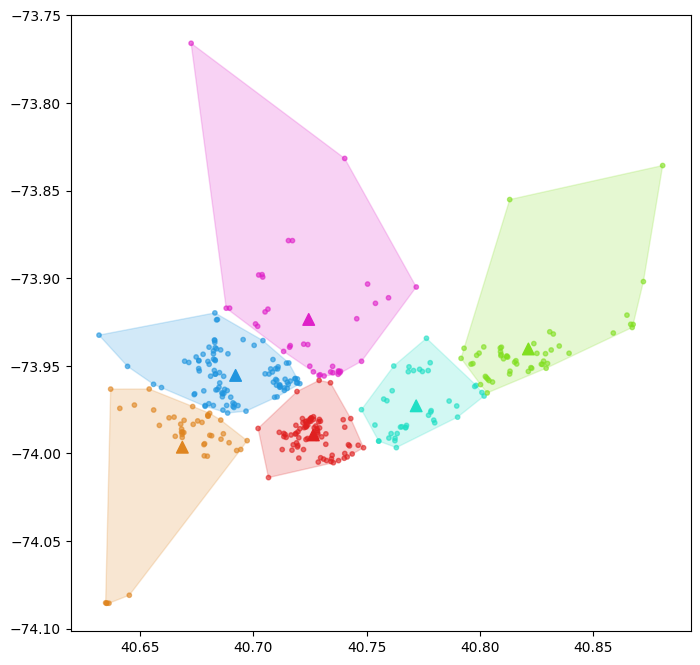

In [19]:
from scipy.spatial import ConvexHull 
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

В данном случае можно сказать, что среди элементов розового и зелёного кластеров содержатся выбросы, за счёт которых выпуклая оболочка стала большой. Элементы синего кластера наиболее похожи между собой, элементы красного довольно разнообразны относительно других кластеров.

    → Таким образом, если мы хотим лучше понять, какие данные находятся в кластерах, насколько сильно они схожи между собой или различны, на помощь придёт график Convex Hull.

Диаграмма рассеяния и Convex Hull помогают визуализировать только результаты, т. е. то, как данные разделились на кластеры. Для иерархической же кластеризации мы можем визуализировать не только полученные результаты, но и то, как данные делились на кластеры в ходе работы алгоритма. Для такой визуализации нужно использовать **дендрограммы**.

**Дендрограмма**

>Данный способ визуализации необходим, если мы хотим визуализировать результаты иерархической кластеризации.

Из дендрограммы можно вынести много полезной информации. На дендрограмме можно:

* наблюдать, как работал алгоритм: как объединялись (или разбивались) кластеры;
* понять, насколько похожи соседние кластеры между собой;
* предположить, какое количество кластеров можно было бы выбрать для кластеризации.

Для визуализации дендрограммы нам понадобится библиотека *Scipy* и модули *dendrogram* и *linkage*.

`linkage` — это способ расчёта расстояния между двумя кластерами.

В переменной method можно задать разные способы расчёта расстояния: `single`, `complete`, `average`, `weighted`, `centroid`, `median`, `ward`.

Функция `dendrogram` строит дендрограмму, основываясь на информации о расстоянии объектов, полученной из функции linkage. Данная информация позволяет строить на дендрограмме ветви разной высоты.

Наиболее важные переменные, которые принимает функция `dendrogram`:

* `Z` — расстояния до объектов кластеров, полученные из функции linkage.
* `orientation` — ориентация дендрограммы. Данный параметр может принимать значения top, bottom, left, right.
* `labels` — список с предсказаниями, к какому кластеру какой объект относится.
* `distance_sort` — определяет, в каком порядке будут визуализированы кластеры: `ascending` или `True` означает, что сначала отрисовывается пара кластеров с максимальным расстоянием между ними; `descending` или `False` — что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-4_11.png)

Запустим агломеративную кластеризацию на данных об аренде жилья на *Airbnb* в Нью-Йорке:

In [20]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

Визуализируем результаты:

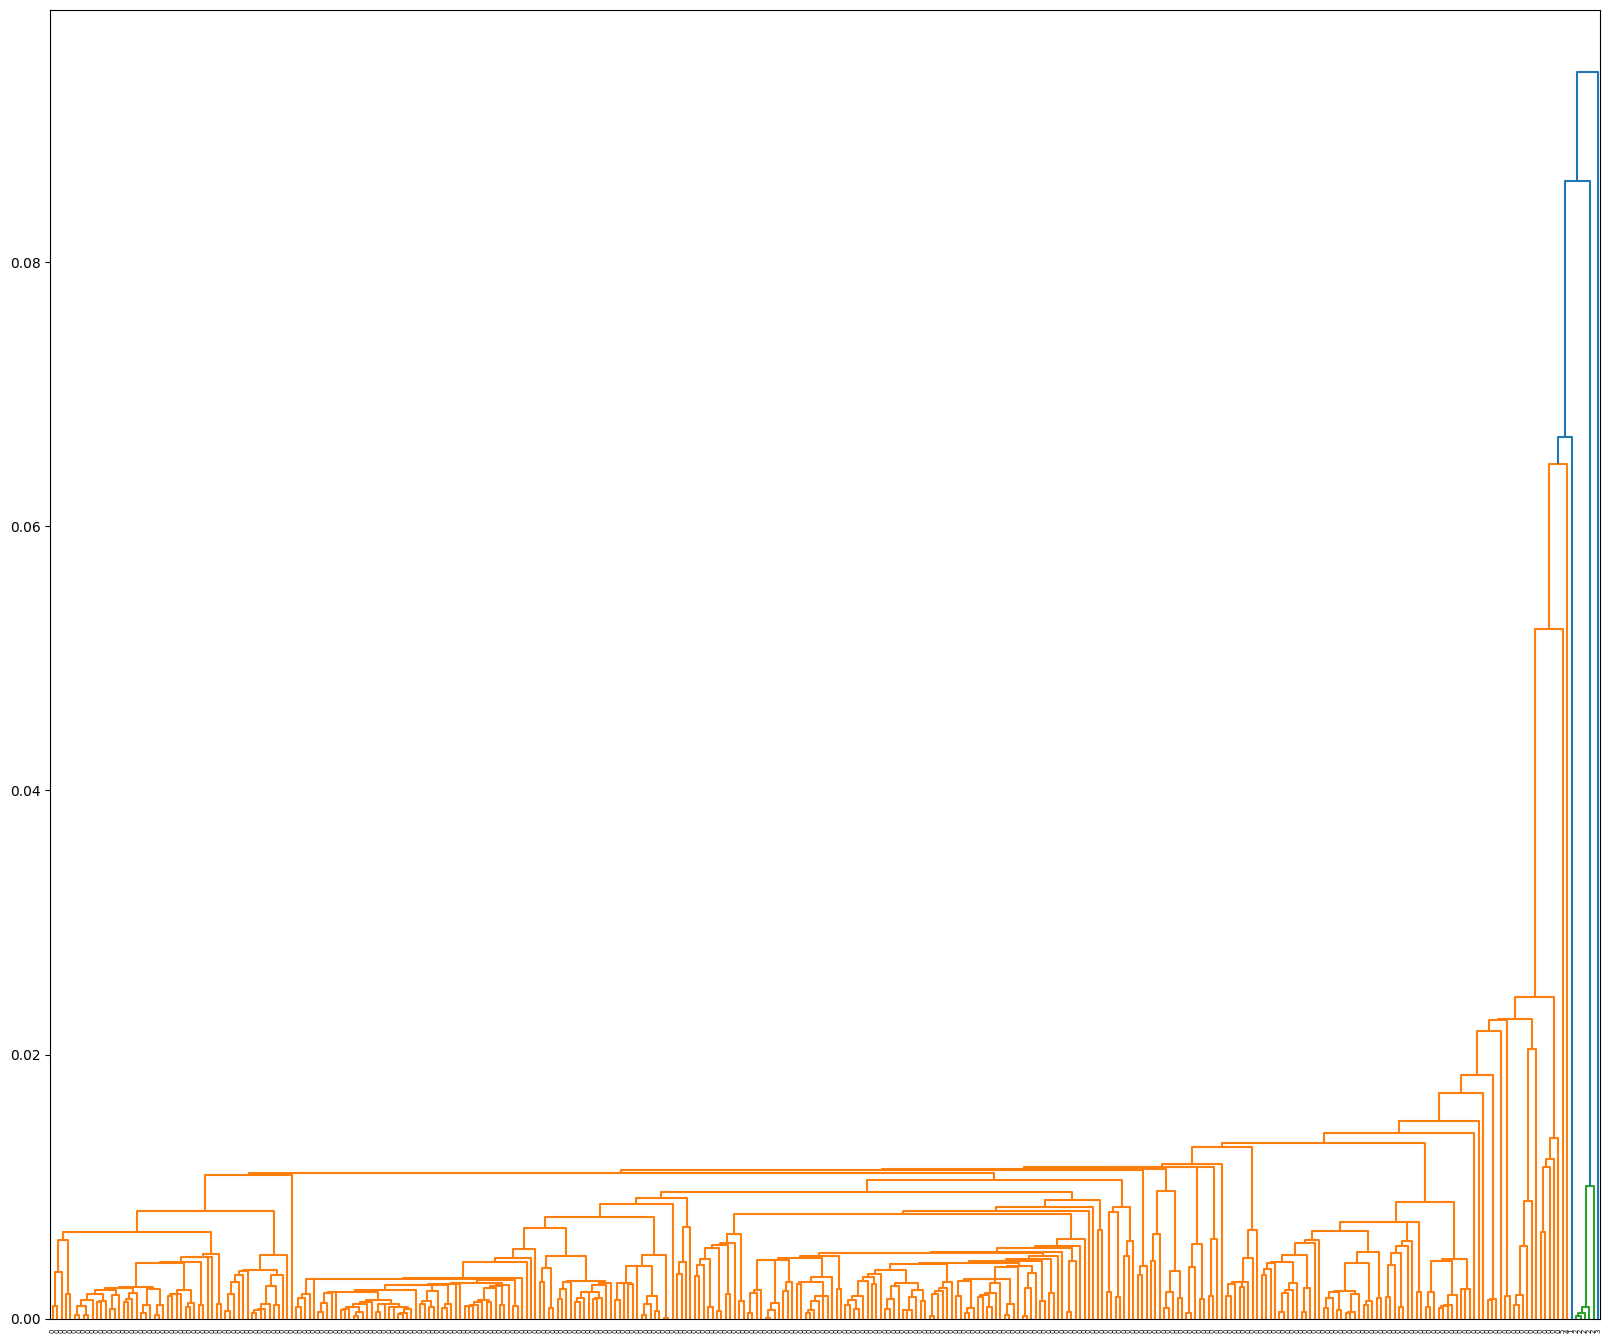

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

Так как данных немало, график получается несколько перегруженным. На дендрограмме можно наблюдать, как проходил процесс кластеризации: исходные элементы, находящиеся снизу, объединялись сначала в много мелких кластеров, затем эти кластеры объединялись между собой, пока в самом конце все кластеры не объединились в один большой.

Из данного графика понятно, на сколько кластеров можно разделить данные. В данном случае, основываясь на значениях расстояний между кластерами, мы можем провести мысленную горизонтальную линию и посмотреть, сколько ветвей дендрограммы она пересечёт (это количество и будет равно количеству кластеров). Например, если мы считаем, что расстояния 0.04 между кластерами достаточно для того, чтобы считать кластеризацию завершённой, данные нужно делить на шесть кластеров. На рисунке ниже мы провели мысленную горизонтальную линию на значении 0.04. Данная линия пересекла шесть ветвей дендрограммы:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-4_13.png)

Также по дендрограмме мы можем понять, насколько кластеры похожи между собой: чем меньше высота внутренних веток, тем более похожими считаются кластеры. В нашем случае можно наблюдать, что в самом начале объекты были схожи, так как высота внутренних веток была маленькой, а далее, когда внутренних веток осталось шесть, высота стала больше, то есть кластеры стали отличаться друг от друга:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-4_14.png)

График дендрограммы получается довольно информативным, но его можно использовать только для иерархической кластеризации. Что делать, если для других видов кластеризации также хочется наблюдать, как данные делятся на два, три и более кластеров? Для этого можно использовать **Clustergram-визуализацию**.

**Clustergram**

Построение кластеров можно отследить только для иерархической кластеризации. Для k-means-кластеризации мы можем только визуализировать полученные кластеры. Однако иногда бывает интересно представить, как выглядели бы данные, если бы кластеров было, например, два, а не три.

Относительно недавно был разработан ещё один способ визуализации — **Clustergram**.

>Данная визуализация позволяет понять, что происходит с данными при разном количестве кластеров, и полезна при исследовательском анализе. Также она может быть полезна и для иерархической кластеризации, когда объектов много и дендрограмма получается сложной для понимания.

    Далее мы рассмотрим только базовые принципы Clustergram-кластеризации. Более подробную информацию можно найти тут.

    Графики Clustergram позволяют отследить, как делятся данные при разном количестве кластеров. Более того, можно оценить, в каком кластере объектов больше, а в каком — меньше.

Графики *Clustergram* выглядят следующим образом:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-4_15.png)

Как их интерпретировать?

Изначально все наблюдения образуют единый кластер (исходные данные). После данные делятся на два кластера. При этом можно заметить, что нижняя линия толще — это означает, что во второй кластер попало больше объектов. Далее данные делятся на три кластера, при этом второй снизу кластер образуется путём слияния некоторых элементов из двух предыдущих кластеров.

    → Построить такой график можно не для всех алгоритмов кластеризации, а только для k-means, GMM и иерархической кластеризации. Метод кластеризации задаётся в поле method, по умолчанию выбрана k-means-кластеризация.

Установить данную библиотеку можно через pip:

`pip install clustergram`

Попробуем визуализировать данные:

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.007 seconds.
K=3 fitted in 0.005 seconds.
K=4 fitted in 0.004 seconds.
K=5 fitted in 0.004 seconds.
K=6 fitted in 0.005 seconds.
K=7 fitted in 0.005 seconds.
K=8 fitted in 0.004 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

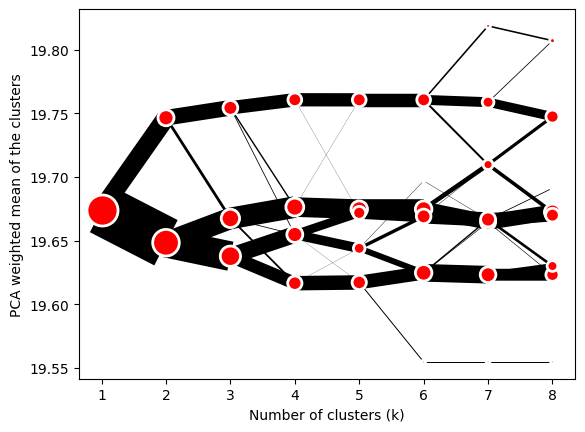

In [22]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

На данном графике мы можем наблюдать, как изменяются данные в ходе кластеризации. Сначала один кластер разделился на два. При этом эти кластеры неравномерные: в нижнем кластере данных существенно больше (так как нижняя линия значительно толще), чем в верхнем. Далее данные делятся на три кластера, при этом количество объектов в двух кластерах примерно одинаковое, а в третьем, верхнем, кластере объектов всё ещё меньше. Таким образом мы можем оценивать равномерность получившихся кластеров.

### <center>3D-визуализация

Если кластеризация проводится не в двухмерном пространстве (по двум признакам), а в трёхмерном, для того, чтобы визуально оценить её результаты, необходимо проводить визуализацию в 3D-пространстве. В этом нам поможет библиотека Matplotlib или Plotly. 

Выше мы рассматривали кластеризацию в двухмерном пространстве и кластеризовали жильё в Нью-Йорке, представленное для аренды на Airbnb, основываясь на широте и долготе. Теперь давайте добавим третий признак — суточную стоимость аренды (поле price в датафрейме).

Чтобы визуализировать результаты 3D-кластеризации, её необходимо сначала провести:

In [23]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

Визуализация с помощью библиотеки Matplotlib:

Text(0.5, 0, 'price')

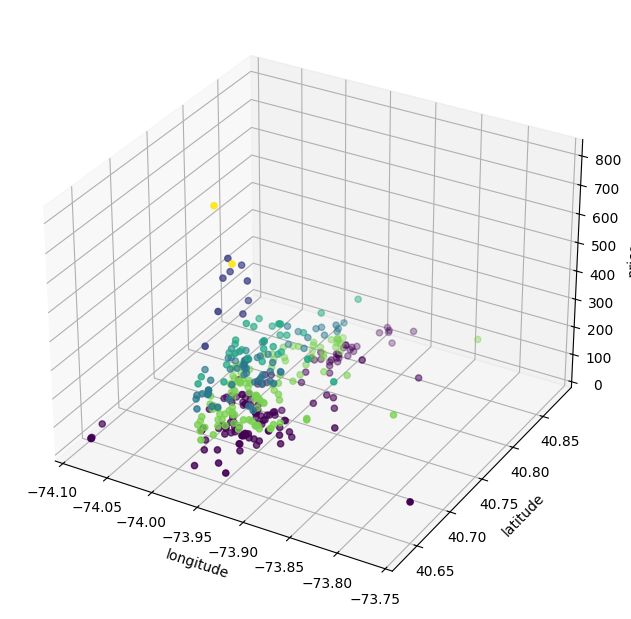

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Однако при визуализации с этого ракурса не очень понятно, где находится зелёная точка, — кажется, что она потерялась среди синих:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-4_18.png)

Чтобы изменить угол обзора, существует два параметра:

* `ax.azim` — куб будет вращаться слева направо в зависимости от изменения этой величины;
* `ax.elev` — куб будет вращаться снизу вверх в зависимости от изменения данной величины.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-4_19.png)

Изменим угол визуализации:

Text(0.5, 0, 'price')

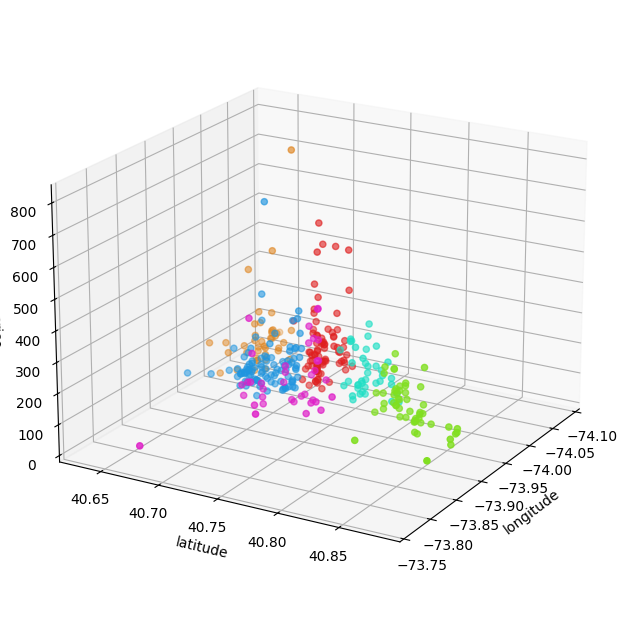

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.color)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Теперь, если рассматривать график под другим углом, мы видим, что на самом деле зелёная точка не потерялась среди элементов другого кластера. Данные в трёхмерном пространстве образовали чёткие кластеры, и в основном они основываются на цене арендных квартир. Внизу мы видим фиолетовый кластер с самыми дешёвыми квартирами, а наверху — сиреневый и зелёный кластеры с самыми дорогими. При этом они, по всей видимости, располагаются в одном районе, так как значения широты и долготы довольно близкие.

    → Таким образом, при статической визуализации 3D-пространства бывает полезно рассмотреть график с нескольких сторон, чтобы однозначно оценить результаты кластеризации.

Хоть мы и получили нужную информацию из предыдущей визуализации, но было не совсем удобно каждый раз задавать для 3D-графика параметры обзора. Было бы идеально сделать график интерактивным, чтобы один раз провести визуализацию, а затем самим поворачивать график, как нам удобно. В этом поможет Plotly:

In [28]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

Анализируя результаты кластеризации, полученные с помощью Plotly, можно прийти к тем же выводам, которые мы сделали до этого. Но в данном случае мы можем интерактивно рассматривать график, а это намного удобнее.

    → В данном юните мы рассмотрели разные способы визуализации кластеров. На практике вы, скорее всего, будете чаще пользоваться диаграммой рассеяния для быстрой визуальной проверки результатов кластеризации для двухмерного и трёхмерного случаев.

Подведём общий итог и соберём все способы визуализации кластеров в сводную таблицу, чтобы понять, какую визуализацию следует использовать в зависимости от целей и используемых алгоритмов кластеризации.

![](./image/ML_4_9.png)

    ✍ В предыдущих юнитах мы работали преимущественно в двухмерном или трёхмерном пространстве. Наши объекты описывались двумя или тремя признаками. Однако зачастую в реальных задачах объекты описываются куда большим числом признаков, а значит, работать приходится в многомерном пространстве, которое невозможно визуализировать.

**Трудности могут возникнуть, если:**

* нужно визуализировать результаты кластеризации, а пространство признаков многомерное.
* нужно обучить модель, а объект описывается большим количеством признаков. Эти признаки могут быть избыточными или малоинформативными, что приведёт к плохим результатам при обучении модели.

Избежать этих проблем поможет **снижение размерности данных**.

    → Мы встречались с уменьшением размерности ранее, например когда рассматривали спектральную кластеризацию. В данном юните мы поближе познакомимся с тем, как работают алгоритмы снижения размерности, рассмотрим такие техники, как PCA и t-SNE.

Задача снижения размерности — это задача преобразования данных с целью уменьшения количества признаков, которые описывают объект.

Как вы можете догадаться, при уменьшении количества признаков мы теряем часть информации. Например, на изображении ниже Губка Боб после уменьшения размерности стал описываться меньшим количеством признаков и поэтому стал выглядеть по-другому.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_1.png)

Методы снижения размерности могут преобразовывать данные двумя способами:

* линейно,
* нелинейно.

#### <center>PCA

**Метод главных компонент**, или **PCA (Principal Components Analysis)** — это один из базовых способов уменьшения размерности.

**Данный метод имеет широкое применение:**

* Подавление шума на изображениях.

Изображение состоит из пикселей, которые можно рассматривать как набор точек в многомерном пространстве. С помощью метода снижения размерности PCA можно преобразовать этот набор точек и оставить только первые компоненты, полученные после преобразования. В этих компонентах будет содержаться основная информация об изображении, но не будет шума. Таким образом мы улучшим качество изображения.

Качество картинки с шумом и без него:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_2.png)

* Индексация видео для быстрого поиска по базе.

Каждый кадр видео можно преобразовать с помощью PCA и представить несколькими значениями. Далее эти значения легко хранить и искать в базе.

>Для уменьшения размерности метод главных компонент проводит линейное преобразование пространства, которое сохраняет длины векторов. Таким образом происходит отображение признаков в новое пространство с меньшей размерностью.

>В новом пространстве появляются новые оси. Они строятся таким образом, что для первой оси дисперсия данных должна быть максимальной, а вторая ось ортогональна первой и имеет максимально возможную дисперсию.

>**Первой главной компонентой** будет называться первая ось в новом пространстве.

Например, если у нас есть данные о полученных студентами баллах на экзаменах по двум предметам, мы можем визуализировать эти данные в 2D-пространстве, где по оси x будут баллы по одному предмету, а по оси y — по второму:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_3.png)

Далее мы вводим две новые оси, которые являются линейными комбинациями предыдущих. Ось PC1 проходит через максимальную дисперсию данных и является суммой исходных осей, а ось PC2 является разницей двух исходных осей, перпендикулярна первой оси и тоже проходит через максимальную оставшуюся дисперсию:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_4.png)

Таким образом, мы получили первую главную компоненту и вторую компоненту. При этом первая компонента несёт в себе максимум информации о данных, а в каждой последующей компоненте информации всё меньше.

Рассмотрим, **как запустить PCA с помощью библиотеки sklearn**:

`# из модуля decomposition библиотеки sklearn импортируем класс PCA`

`from sklearn.decomposition import PCA`

`# создаём объект класса PCA`

`# n_components — задаём количество компонентов для проведения трансформации`

`pca = PCA(n_components=2, random_state=42)`

`# обучаем модель на данных X`

`pca.fit(X)`

`# применяем уменьшение размерности к матрице X`

`pca.transform(X)`

Также мы можем сразу обучить модель и применить трансформацию уменьшения размерности:

`pca.fit_transform(X)`

Теперь рассмотрим работу с PCA на практике. Из датасетов sklearn импортируем датасет **MNIST** — это данные, основанные на рукописном начертании цифр:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_5.png)

Для данного датасета обучим модель, которая по пикселям изображения предсказывает, что за цифра на нём изображена. Первой мы разработаем модель, которая будет учитывать все признаки, а затем уменьшим размерность данных с помощью PCA и ещё раз обучим модель. Далее мы сравним качество полученных моделей и время, которое было затрачено на обучение в каждом случае.

В датасете MNIST представлено 70 000 изображений, каждое из которых описывается 784 признаками.

`# загрузим датасет MNIST`

`from sklearn.datasets import fetch_openml`

`from sklearn.model_selection import train_test_split`


`dataset = fetch_openml("mnist_784")`

`# загрузим признаки в переменную X`

`X = dataset['data']`

`# загрузим «ответы» в переменную y`

`y = dataset['target']`

`# разделим данные с помощью sklearn на данные для обучения и теста`

`train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)`


`# импортируем StandardScaler для стандартизации данных`

`from sklearn.preprocessing import StandardScaler`


`# создадим объект класса StandardScaler`

`scaler = StandardScaler()`

`scaler.fit(train_x)`

`# трансформируем датасеты train_x и test_x`

`train_x = scaler.transform(train_x)`

`test_x = scaler.transform(test_x)`


`# импортируем класс PCA`

`from sklearn.decomposition import PCA`


`# создадим объект класса PCA`

`pca = PCA(n_components=300)`

`pca.fit(train_x)`

`# уменьшим размерность данных`

`train_x_pca = pca.transform(train_x)`

`test_x_pca = pca.transform(test_x)`

Посмотрим, сколько признаков описывало объект до и после уменьшения размерности. Как мы можем заметить, сначала было 787 признаков, а в конце объект описывают уже 300 главных компонент:

`print(len(train_x[0]))`

`print(len(train_x_pca[0]))`

Обучим модель логистической регрессии, которая на вход будет принимать пиксели изображения и предсказывать, что на нём нарисовано.

Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. В качестве метрики оценивания качества будем использовать метрику accuracy.

`from sklearn.linear_model import LogisticRegression`

`from sklearn.metrics import accuracy_score`

`from time import time`


`# напишем функцию, которая на вход принимает X и y, а возвращает модель и время`

`def get_time_and_accuracy(train_x, train_y, test_x, test_y):`

`    # создадим объект класса LogisticRegression`

`    log_reg_model = LogisticRegression(max_iter=1000)`

`    # запишем время с начала эпохи в секундах до обучения модели`

`    start_time = time()`

`    # обучим модель`

`    log_reg_model.fit(train_x, train_y)`

`    # запишем время с начала эпохи в секундах после обучения`

`    end_time = time()`

`    # подсчитаем время, потраченное на обучение модели`

`    delta_time = end_time-start_time`

`    # предскажем на тестовых данных`

`    y_pred = log_reg_model.predict(test_x)`

`    # посчитаем скор для тестового предсказания`

`    score = accuracy_score(test_y, y_pred)`

`    # вернём время, потраченное на обучение, и качество полученной модели`

`    return delta_time, score`


`model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)`

`print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")`

`# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286`


`model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)`

`print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")`

`# Модель, построенная на всех исходных признаках. Время обучения 108.04033303260803, метрика модели 0.9187142857142857`


                    Время на обучение	Качество модели

Признаки после PCA	54.12	            0.9256

Исходные признаки	108.04	            0.9187

Как видим, в данном случае мы потратили на обучение модели в два раза меньше времени, а качество осталось практически таким же.

>В реальной работе бывает гораздо больше данных и на обучение модели уходит отнюдь не две минуты. Таким образом, применив технику уменьшения размерности, можно существенно сэкономить время.

    → Мы научились ускорять обучение моделей с помощью понижения размерности данных, а теперь давайте научимся визуализировать многомерное пространство.

#### <center>t-SNE

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет **t-SNE (t-distributed Stochastic Neighbor Embedding)**, что переводится с английского как «стохастическое вложение соседей с t-распределением». 

    t-SNE, в отличие от PCA, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

Рассмотрим t-SNE на примере понижения размерности двухмерного пространства до одномерного.

Если у нас есть такое распределение точек, как на графике ниже,

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_6.png)

то, казалось бы, чтобы уменьшить размерность данных, нужно просто спроецировать эти точки на ось x:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_7.png)

Но, как мы видим, розовый и синий кластеры перестают быть различными кластерами, когда мы проецируем данные на ось X — данные перемешались. t-SNE позволяет не допускать такого.

**Алгоритм состоит из следующих шагов:**

1. В исходном многомерном пространстве для каждого объекта из датасета рассчитываем евклидово расстояние между объектами. Далее с помощью нормального распределения попарно сравниваем объекты датасета. На основе этих значений строится матрица, которая содержит значения схожести объектов:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_8.png)

На рисунке выше показано, как для одной точки рассчитали расстояние до всех других точек датасета, далее получили схожесть объектов с помощью нормального распределения и построили матрицу. На данной матрице по строкам и столбцам находятся объекты датасета, а в ячейках — значения схожести двух объектов. Красным обозначена похожесть объекта на самого себя (в таком случае это значение максимально), а розовым — объекты, которые имеют большую схожесть.

2. На втором шаге мы уменьшаем размерность данных. Здесь мы случайным образом проецируем объекты из двухмерного пространства на ось x. Далее, как и на первом шаге, мы считаем схожесть объектов в новом пространстве, но для подсчёта используем не нормальное распределение, а t-распределение. После этого строим матрицу попарной схожести объектов:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_9.png)

3. Далее необходимо создать новую матрицу сходства, которая будет похожа на исходную:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_10.png)

С каждой итерацией точки перемещаются к своим ближайшим соседям из исходного многомерного пространства и удаляются от отдалённых:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_11.png)

Таким образом, мы итеративно приходим к разделению объектов в новом пространстве.

Работа алгоритма выглядит так:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_12.gif)

На первой итерации данные расположены хаотично, но с каждой итерацией похожие объекты подходят ближе друг к другу, а непохожие отдаляются друг от друга.

**Как запустить t-SNE?**

`# импортируем класс TSNE из модуля manifold библиотеки sklearn`

`from sklearn.manifold import TSNE`


`# создаём объект класса TSNE`

`# n_components — размерность нового пространства`

`tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)`

`# обучаем модель на данных X и производим трансформацию`

`tsne.fit_transform(X)`

**Важные параметры для запуска:**

* `n_components` — размерность нового пространства.
* `perplexity` — один из важнейших параметров для запуска. Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение perplexity. Обычно используют значения в диапазоне от 5 до 50.
* `n_iter` — количество итераций для оптимизации.
* `random_state` — так как в алгоритме есть случайность, задание random_state позволяет от запуска к запуску получать одинаковые результаты.

Теперь попробуем уменьшить размерность и визуализировать пространство пикселей, которые описывают данные рукописного начертания цифр. Сравним, какая визуализация получается при использовании PCA и tSNE.

**Уменьшим размерность с помощью PCA:**

`import seaborn as sns`


`# создадим объект класса PCA, уменьшим размерность данных до 2`

`pca = PCA(n_components=2, random_state=42)`

`# уменьшим размерность данных`

`X_reduced = pca.fit_transform(train_x)`

`# сохраним данные в датафрейм`

`df_pca = pd.DataFrame(X_reduced)`

`# сохраним разметки кластеров`

`df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()`

`# визуализируем`

`sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])`

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_13.png)

**Уменьшим размерность с помощью t-SNE:**

`# создадим объект класса TSNE, уменьшим размерность данных до 2`

`tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)`

`# уменьшим размерность данных`

`X_reduced = tsne.fit_transform(train_x)`

`# сохраним данные в датафрейм`

`df_tsne = pd.DataFrame(X_reduced)`

`# сохраним разметки кластеров`

`df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()# визуализируем`

`sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])`

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-6_14.png)

Как видим, алгоритм t-SNE отлично справляется с уменьшением размерности для визуализации, а вот при использовании PCA данные не разделились на кластеры и пересекаются друг с другом — такую визуализацию будет неудобно анализировать.

___________

изучили несколько техник уменьшения размерности данных. Эти методы используются для разных целей. Давайте кратко подведём итоги и составим сводную таблицу:

![](./image/ML_4_10.png)

### <center>практика

К нам пришёл заказчик, которому необходимо проанализировать клиентов торгового центра и выделить разные группы покупателей, чтобы понять, как дальше развивать услуги торгового центра, магазины каких сегментов открывать.

В файле содержится основная информация о покупателе: идентификатор, возраст, пол, доход, индекс расходов. Индекс расходов считается на основе таких параметров, как поведение клиента и данные о покупках, и принимает значение от 1 до 100.

Также в файле содержится информация об истинных метках кластеров для клиентов (они нам пригодятся позже).

В ходе работы мы **подготовим датасет, попробуем несколько видов кластеризации и оценим её качество**.

1. Начнём с просмотра датасета:

In [30]:
# импортируем библиотеки для работы с данными
import pandas as pd
from sklearn import preprocessing 

# загрузим данные
df = pd.read_csv("./data/segmented_customers.csv")
# посмотрим на данные
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19.0,15.0,39.0,4.0
1,2,Male,21.0,15.0,81.0,3.0
2,3,Female,20.0,16.0,6.0,4.0
3,4,Female,23.0,16.0,77.0,3.0
4,5,Female,31.0,17.0,40.0,4.0


2. Проведём предобработку данных: удалим пропуски и дубли, признак `Gender` превратим в бинарный с помощью `LabelEncoder`:

In [31]:
# посмотрим, есть ли пропуски в датасете
df[df.isna().any(axis=1)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
200,201,Female,21.0,NaN,40.0,0.0
201,202,Female,30.0,127.0,NaN,NaN
202,203,Male,80.0,NaN,20.0,NaN
203,204,Male,NaN,16.0,120.0,NaN
204,205,Female,NaN,9.0,80.0,NaN


In [32]:
# пропусков не так много, поэтому мы можем удалить данные с пропусками
df = df.dropna()

# переименуем столбцы для более удобной работы
df.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

In [33]:
# проверим, есть ли в данных дубликаты
df[df.duplicated(subset=['customer_id'])]

,customer_id,gender,age,annual_income,spending_score,cluster


Дубликатов нет, поэтому идём дальше.

3. Чтобы мы могли визуально оценивать результаты кластеризации, будем проводить её по трём признакам, а именно: годовой заработок, коэффициент покупательской способности и возраст. Визуализируем распределение данных:

In [34]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
fig = px.scatter_3d(
    data_frame=df, 
    x = 'age', 
    y = 'annual_income', 
    z = 'spending_score', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

4. Так как нам часто будет требоваться визуализировать результаты кластеризации, напишем для этого функцию. Она будет принимать датафрейм и название столбца датафрейма с результатами кластеризации. Так как нас будут стабильно интересовать три столбца (age, annual_income, spending_score), зафиксируем их названия внутри функции:

In [35]:
def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

5. Сохраним признаки, по которым будем проводить моделирование, в переменную `X`:

In [36]:
X = df[['age', 'annual_income', 'spending_score']]

Как мы видим, данные разрежённые и неоднородные, а значит, применять *DBSCAN* будет сложно, нужно будет подбирать параметры для кластеризации.

**Задание 10.1**

Попробуйте провести *DBSCAN*-кластеризацию со значениями по умолчанию. Сколько кластеров у вас получилось?

In [43]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
dbscan = DBSCAN()
clustering_dbscan_res = dbscan.fit_predict(X)
df['dbscan_res_def'] = clustering_dbscan_res

get_3d_visualization(df, 'dbscan_res_def')

#отображаем график
fig.show()

6. Как видно, алгоритм плохо работает с настройками по умолчанию, поэтому попробуем изменить их.

Большая часть наших данных разрежённые, а чем больше разброс точек в датасете, тем большее значение радиуса вокруг точки (eps) нужно задавать. Так как данные разрежённые, попробуем увеличить значение eps до 11 и визуально оценим результат:

In [37]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
dbscan = DBSCAN(eps=11)
clustering_dbscan_res = dbscan.fit_predict(X)
df['dbscan_res_eps_11'] = clustering_dbscan_res

get_3d_visualization(df, 'dbscan_res_eps_11')

**Задание 10.2**

Подходит ли, по-вашему, алгоритм DBSCAN для решения поставленной задачи?

* Да
* /Нет

**Задание 10.3**

По каким признакам вы оценили качество алгоритма?

* /Много точек, которые должны относиться к кластеру, были размечены как выбросы (синие точки).
* Алгоритм очень чётко разделил объекты на пять кластеров.

7. Проведём агломеративную кластеризацию, чтобы построить дендрограмму и по ней оценить количество кластеров, на которое можно разделить датасет. Напишем функцию, которая будет принимать количество кластеров и матрицу с признаками:

In [38]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

8. Теперь, вооружившись знаниями из юнита про иерархическую кластеризацию, самостоятельно проведите агломеративную кластеризацию, воспользовавшись функцией, которую мы только что написали. После этого визуализируйте полученную дендрограмму. Количество кластеров для кластеризации укажите равным 3 (на данном этапе это не очень важно).

Дендрограмма, которая должна получиться:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-10_3.png)

Если что-то пошло не так, сравните ваш код, и код, с помощью которого получили данную дендрограмму:

Эталонный код:

`# импортируем библиотеку scipy, чтобы визуализировать дендрограмму`

`from scipy.cluster.hierarchy import dendrogram, linkage`

`from matplotlib import pyplot as plt`


`# запускаем агломеративную кластеризацию и сохраним результаты в df`

`df['aggl_res_3'] = get_aggl_clustering(X, 3)`


`linked = linkage(X, 'ward')`

`plt.figure(figsize=(10, 7))`


`dendrogram(linked,`

`            orientation='top',`

`            labels=df['aggl_res_3'].to_list(),`

`            distance_sort='descending',`

`            show_leaf_counts=True)`


`plt.show()`

Как мы можем судить из дендрограммы, если взять евклидово расстояние между кластерами, равное 150, датасет будет делиться на шесть кластеров.

Давайте визуально оценим, что из этого получилось. Для этого обучим модель агломеративной кластеризации с количеством кластеров, равным 6:

In [39]:
df['aggl_res_6'] = get_aggl_clustering(df[['age', 'annual_income', 'spending_score']], 6)
get_3d_visualization(df, 'aggl_res_6')

Итак, кластеры разделились хорошо.

Теперь давайте воспользуемся коэффициентом силуэта и узнаем оптимальное количество кластеров. Совпадает ли это число с тем, что мы подобрали, используя дендрограмму?

**Задание 10.4**

Для агломеративной кластеризации самостоятельно с помощью коэффициента силуэта подберите оптимальное количество кластеров. Сколько кластеров у вас получилось?

8. 


<Axes: xlabel='cluster', ylabel='silhouette'>

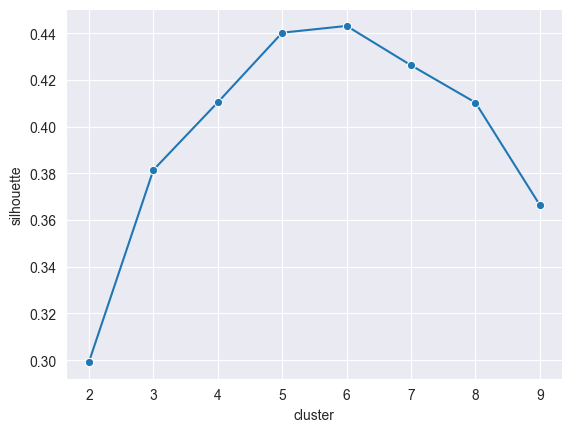

In [40]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# напишем функцию для подсчёта коэффициента силуэта
def get_silhouette_agg_clust(X, cluster_num):
    # проведём агломеративную кластеризацию с заданным количеством кластеров
    res = get_aggl_clustering(X, cluster_num)
    # рассчитаем коэффициент силуэта
    silhouette = silhouette_score(X, res)
    return silhouette


# создадим пустой словарь, ключами будут коэффициент силуэта и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}


for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_agg_clust(X, cluster_num))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")

Как видим, пик коэффициента силуэта находится на значении 6. Таким образом, оптимальное количество кластеров — 6.

9. Теперь рассмотрим столбец cluster: в нём есть информация о том, к какому кластеру должен принадлежать каждый объект из датасета. Значит, мы можем проверить качество кластеризации, посчитав различные метрики.

**Задание 10.5**

Нам очень важно, чтобы в ходе кластеризации не были выделены лишние группы, так как это помешает анализу покупателей. Таким образом, нужно, чтобы кластеры получались максимально наполненными элементами.

Какую метрику вы будете использовать?

* /Метрику полноты
* Индекс Рэнда
* Метрику однородности
* V-меру

9. Метрику полноты можно вызвать из модуля *cluster* библиотеки *sklearn*. Метрика рассчитывается следующим образом:

In [41]:
from sklearn.metrics.cluster import completeness_score

print(completeness_score(labels_true=df.cluster, labels_pred=df.aggl_res_6))
# 0.9012847747610448

0.9012847747610448


Судя по значению метрики, кластеризация проведена отлично: кластеры получились наполненными элементами, а значит данные результаты можно дальше использовать для анализа.

✍ мы познакомились с различными методами кластеризации:

* k-means;
* иерархической кластеризацией;
* EM-алгоритмами кластеризации;
* спектральной кластеризацией;
* кластеризацией на основе плотности.

Теперь мы знаем, зачем нужно так много разных алгоритмов кластеризации.

Также мы научились подбирать оптимальное количество кластеров для моделирования. Для этого можно использовать:

* дендрограмму, полученную в ходе иерархической кластеризации;
* метод локтя;
* индекс силуэта.

Кластеризацию нужно не только успешно провести, но и визуализировать результаты.

* При кластеризации по двум признакам можно использовать 2D-визуализацию.
* Если признаков было три, поможет 3D-визуализация.
* Если признаков больше трёх, на помощь приходит понижение размерности с двумя алгоритмами, используемыми для этой цели — t-SNE и PCA: t-SNE решает проблему визуализации, а PCA чаще используется для ускорения обучения моделей.

С помощью кластеризации и уменьшения размерности можно решать множество задач, главное — использовать эти методы с умом.